In [1]:
# Let's start by laoding the quick draw dataset 
import numpy as np

In [2]:
data = np.load("C:/Users/ISHMO_CT/Downloads/my-projects/nueral_env/QDNP/dataset/quickdraw10.npz")

In [3]:
X = data['arr_0']
y= data['arr_1']

In [4]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

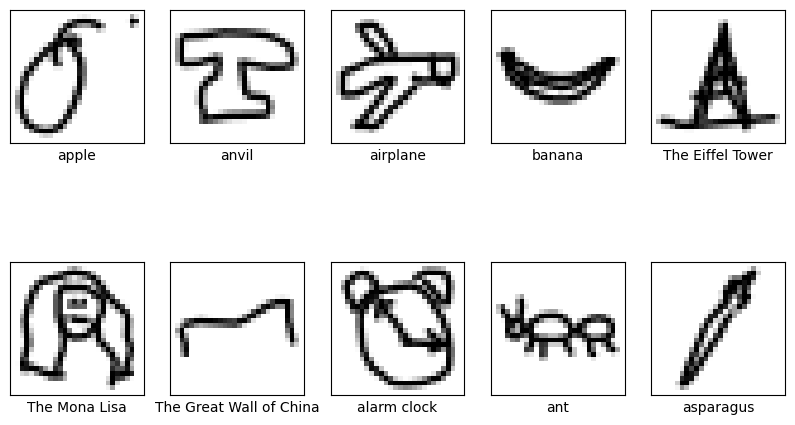

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2, 5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start = start + 10000

plt.show()


In [6]:
# Normalize the data 
import tensorflow as tf

input_dim = X.shape[1]
n_output_labels = len(np.unique(y))
X_scaled = X/255.0

y_categorical = tf.keras.utils.to_categorical(y, num_classes=n_output_labels)

In [21]:
# lets build the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation='sigmoid', input_shape=(input_dim,)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(n_output_labels, activation='softmax'),
])

In [27]:
# compile the model 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,860 (2.07 MB)

 Trainable params: 543,860 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# fit the model 
epochs = 20

history = model.fit(X_scaled, y_categorical, epochs = epochs, validation_split=0.2)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9001 - loss: 0.3302 - val_accuracy: 0.0000e+00 - val_loss: 9.9039
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9008 - loss: 0.3283 - val_accuracy: 0.0000e+00 - val_loss: 9.8458
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9038 - loss: 0.3193 - val_accuracy: 0.0000e+00 - val_loss: 10.0401
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9061 - loss: 0.3133 - val_accuracy: 0.0000e+00 - val_loss: 9.9109
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9062 - loss: 0.3117 - val_accuracy: 0.0000e+00 - val_loss: 10.0072
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9065 - loss: 0.3064 - val_accuracy: 0.0000e+00 - val_loss: 10.0597
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9073 - loss: 0.3046 - val_accuracy: 0.0000e+00 - val_loss: 10.1346
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/s

In [38]:
import pandas as pd
history_df = pd.DataFrame(history.history)

In [39]:
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.899337,0.332150,0.0,9.903872
1,0.901400,0.326438,0.0,9.845842
2,0.903212,0.320873,0.0,10.040095
3,0.904063,0.315763,0.0,9.910897
4,0.906163,0.310496,0.0,10.007232


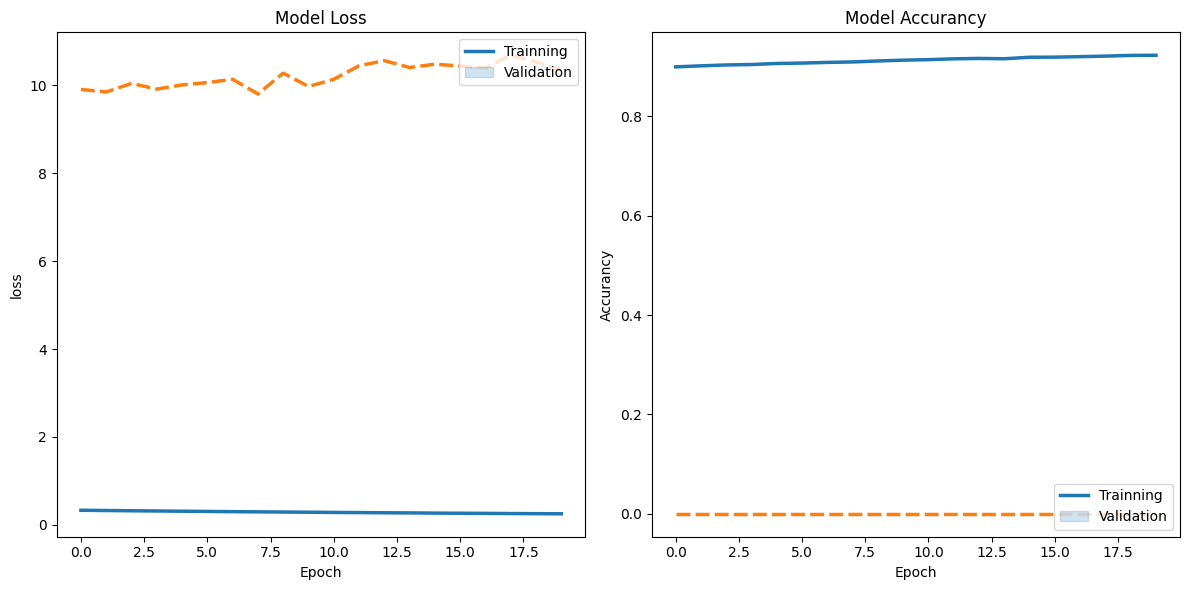

In [40]:
# YOUR CODE HERE
import seaborn as sns
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12,6))

# plotting loss
plt.subplot(1,2,1)
sns.lineplot(data=history_df[['loss', 'val_loss']], palette="tab10", linewidth=2.5)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Trainning', 'Validation'], loc='upper right')

# plotting accurancy
plt.subplot(1,2,2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette="tab10", linewidth=2.5)
plt.title('Model Accurancy')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.legend(['Trainning', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()